Install packages

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

# Load the Excel file
df = pd.read_excel(r"C:\Users\ayads\OneDrive\Documents\Sarah\Research\Asbestos\AsbestosReveal\AsbestosReveal\AsbestosReveal\DATABASE\RAT10000Clean.xlsx")

# Inspect the data
print("Head")
print(df.head())

print("Info")
print(df.info())

print("Description")
print(df.describe())

# Get the number of rows
num_rows = df.shape[0]
print("Number of rows:", num_rows)


Head
      MOA               id_bat  id_lgt  id_mes  \
0     ALH  2001-01-10 00:00:00       1       1   
1     ALH  2001-01-10 00:00:00       1       1   
2     ALH  2001-01-10 00:00:00       1       1   
3  Domnis               101604  0018_0      35   
4  Domnis               101604  0018_0      30   

                        id_p_comp                          id_struct  \
0  Plaques souples antivibratiles  Equipements divers et accessoires   
1             Joints d'étanchéité                                NaN   
2  Plaques souples antivibratiles  Equipements divers et accessoires   
3                   Dalles de sol  Planchers et planchers techniques   
4                   Dalles de sol  Planchers et planchers techniques   

               id_comp type_piece             type_bat   annee  ...  \
0           Baignoires     D_CUIS  Maison individuelle  1975.0  ...   
1                  NaN        NaN                  NaN     NaN  ...   
2   Eviers métalliques     D_CUIS  Maison indivi

In [2]:
pip install matplotlib

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ------- ------------------------------- 30.7/165.5 kB 1.3 MB/s eta 0:00:01
     --------- --------------------------- 41.0/165.5 kB 653.6 kB/s eta 0:00:01
     ------------- ----------------------- 61.4/165.5 kB 465.5 kB/s eta 0:00:01
     ------------- ----------------------- 61.4/165.5 kB 465.5 kB/s eta 0:00:01
     ------------- ----------------------- 61.4/165.5 kB 465.5 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.5 kB 286.7 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.5 kB 286.7 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.5 kB 286.7 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.5 kB 286.7 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.5 kB 286.7 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.5 

Head
      MOA               id_bat  id_lgt  id_mes  \
0     ALH  2001-01-10 00:00:00       1       1   
1     ALH  2001-01-10 00:00:00       1       1   
2     ALH  2001-01-10 00:00:00       1       1   
3  Domnis               101604  0018_0      35   
4  Domnis               101604  0018_0      30   

                        id_p_comp                          id_struct  \
0  Plaques souples antivibratiles  Equipements divers et accessoires   
1             Joints d'étanchéité                                NaN   
2  Plaques souples antivibratiles  Equipements divers et accessoires   
3                   Dalles de sol  Planchers et planchers techniques   
4                   Dalles de sol  Planchers et planchers techniques   

               id_comp type_piece             type_bat   annee  ...  \
0           Baignoires     D_CUIS  Maison individuelle  1975.0  ...   
1                  NaN        NaN                  NaN     NaN  ...   
2   Eviers métalliques     D_CUIS  Maison indivi

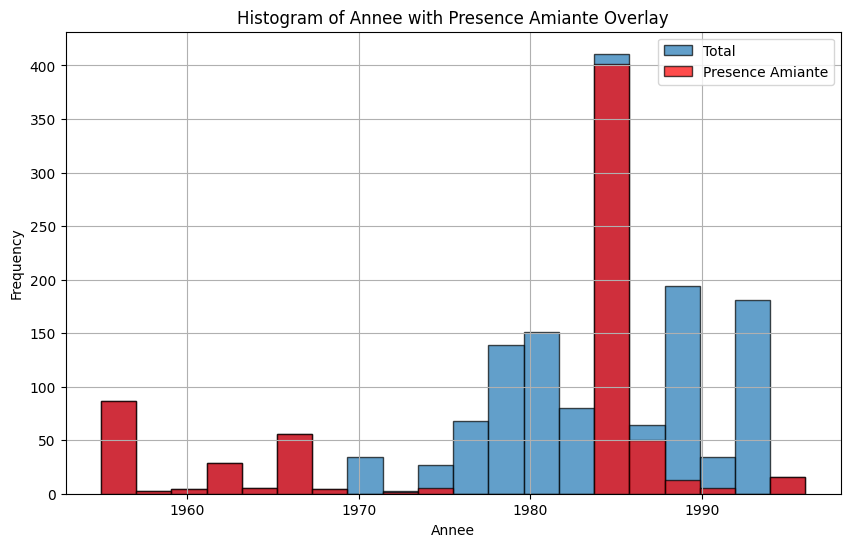

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel(r"C:\Users\ayads\OneDrive\Documents\Sarah\Research\Asbestos\AsbestosReveal\AsbestosReveal\AsbestosReveal\DATABASE\RAT10000Clean.xlsx")

# Inspect the data
print("Head")
print(df.head())
print("Info")
print(df.info())
print("Description")
print(df.describe())

# Plot histogram of 'presence_amiante' with respect to 'annee'
plt.figure(figsize=(10, 6))
plt.hist(df['annee'], bins=20, edgecolor='black', alpha=0.7, label='Total')

# Overlay the histogram for 'presence_amiante' (assuming presence_amiante is binary)
presence_amiante = df[df['presence_amiante'] == 1]['annee']
plt.hist(presence_amiante, bins=20, edgecolor='black', alpha=0.7, color='red', label='Presence Amiante')

plt.title('Histogram of Annee with Presence Amiante Overlay')
plt.xlabel('Annee')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
pip install scikit-learn

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2

# Load your data
df = pd.read_excel(r"C:\Users\ayads\OneDrive\Documents\Sarah\Research\Asbestos\AsbestosReveal\AsbestosReveal\AsbestosReveal\DATABASE\RAT10000Clean.xlsx")

# Drop rows where 'presence_amiante' is NaN
df = df.dropna(subset=['presence_amiante'])

# Define features (X) and target (y)
X = df.drop(['annee', 'id_struct', 'id_p_comp', 'id_comp', 'type_piece'], axis=1)  # Features
y = df['presence_amiante']  # Target variable

# Identify datetime columns
datetime_columns = X.select_dtypes(include=[np.datetime64, 'datetime']).columns
print("Datetime columns:", datetime_columns)

# Convert datetime columns to numerical format
for column in datetime_columns:
    X[column] = (pd.to_datetime(X[column]) - pd.to_datetime(X[column]).min()) / np.timedelta64(1, 'D')

# Identify non-numeric columns after handling datetime columns
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Convert categorical data to numeric using label encoding
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

# Drop rows with any remaining missing values in X
X = X.dropna()
y = y.loc[X.index]  # Ensure the target variable 'y' matches the filtered 'X'

# Inspect missing values after handling
print("Missing values in each column of X after handling missing values:")
print(X.isnull().sum())
print("Missing values in y after handling missing values:")
print(y.isnull().sum())



Datetime columns: Index([], dtype='object')
Non-numeric columns: Index(['MOA', 'id_bat', 'id_lgt', 'type_bat', 'nom_eval',
       'materiaux_parois_ext', 'num_voie', 'comp_voie', 'type_voie',
       'nom_voie', 'commune', 'type_chauffage', 'type_lgt', 'etage',
       'localisation_precision', 'nb_etages'],
      dtype='object')
Missing values in each column of X after handling missing values:
MOA                       0
id_bat                    0
id_lgt                    0
id_mes                    0
type_bat                  0
nom_eval                  0
annee_mise_service        0
materiaux_parois_ext      0
num_voie                  0
comp_voie                 0
type_voie                 0
nom_voie                  0
cd_postal                 0
commune                   0
type_chauffage            0
type_lgt                  0
etage                     0
localisation_precision    0
annee_construction        0
nb_logements              0
nb_etages                 0
surf_hab        

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2

# Load your data
df = pd.read_excel(r"C:\Users\ayads\OneDrive\Documents\Sarah\Research\Asbestos\AsbestosReveal\AsbestosReveal\AsbestosReveal\DATABASE\RAT10000Clean.xlsx")

# Drop rows where 'presence_amiante' is NaN
df = df.dropna(subset=['presence_amiante'])

# Define features (X) and target (y)
X = df.drop(['annee', 'id_struct', 'id_p_comp', 'id_comp', 'type_piece'], axis=1)  # Features
y = df['presence_amiante']  # Target variable

# Check the initial shape of X and y
print("Initial shape of X:", X.shape)
print("Initial shape of y:", y.shape)

# Identify datetime columns
datetime_columns = X.select_dtypes(include=[np.datetime64, 'datetime']).columns
print("Datetime columns:", datetime_columns)

# Convert datetime columns to numerical format
for column in datetime_columns:
    X[column] = (pd.to_datetime(X[column]) - pd.to_datetime(X[column]).min()) / np.timedelta64(1, 'D')

# Identify non-numeric columns after handling datetime columns
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Convert categorical data to numeric using label encoding
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

# Inspect missing values in X
print("Missing values in each column of X before handling missing values:")
print(X.isnull().sum())

# Drop rows with any remaining missing values in X
X = X.dropna()
y = y.loc[X.index]  # Ensure the target variable 'y' matches the filtered 'X'

# Check the shape of X and y after dropping rows with NaNs
print("Shape of X after dropping NaNs:", X.shape)
print("Shape of y after dropping NaNs:", y.shape)

# Check if X is empty
if X.empty:
    print("X is empty after dropping NaNs.")
else:
    # Select the top k features
    k = 5
    best_features = SelectKBest(score_func=chi2, k=k).fit_transform(X, y)

    # Get the selected feature names
    selected_feature_names = X.columns[SelectKBest(score_func=chi2, k=k).fit(X, y).get_support()]

    # Print the selected feature names
    print("Selected features:")
    print(selected_feature_names)


Initial shape of X: (1590, 24)
Initial shape of y: (1590,)
Datetime columns: Index([], dtype='object')
Non-numeric columns: Index(['MOA', 'id_bat', 'id_lgt', 'type_bat', 'nom_eval',
       'materiaux_parois_ext', 'num_voie', 'comp_voie', 'type_voie',
       'nom_voie', 'commune', 'type_chauffage', 'type_lgt', 'etage',
       'localisation_precision', 'nb_etages'],
      dtype='object')
Missing values in each column of X before handling missing values:
MOA                          0
id_bat                       0
id_lgt                       0
id_mes                       0
type_bat                     0
nom_eval                     0
annee_mise_service         563
materiaux_parois_ext         0
num_voie                     0
comp_voie                    0
type_voie                    0
nom_voie                     0
cd_postal                  563
commune                      0
type_chauffage               0
type_lgt                     0
etage                        0
localisation_prec

select the top k features using Mutual Information

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# Load your data
df = pd.read_excel(r"C:\Users\ayads\OneDrive\Documents\Sarah\Research\Asbestos\AsbestosReveal\AsbestosReveal\AsbestosReveal\DATABASE\RAT10000Clean.xlsx")

# Drop rows where 'presence_amiante' is NaN
df = df.dropna(subset=['presence_amiante'])

# Define features (X) and target (y)
X = df.drop(['id_struct', 'id_p_comp', 'id_comp'], axis=1)  # Features
y = df['presence_amiante']  # Target variable

# Check the initial shape of X and y
print("Initial shape of X:", X.shape)
print("Initial shape of y:", y.shape)

# Identify datetime columns
datetime_columns = X.select_dtypes(include=[np.datetime64, 'datetime']).columns
print("Datetime columns:", datetime_columns)

# Convert datetime columns to numerical format
for column in datetime_columns:
    X[column] = (pd.to_datetime(X[column]) - pd.to_datetime(X[column]).min()) / np.timedelta64(1, 'D')

# Identify non-numeric columns after handling datetime columns
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Convert categorical data to numeric using label encoding
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

# Inspect missing values in X
print("Missing values in each column of X before handling missing values:")
print(X.isnull().sum())

# Handle 'annee_construction' separately by filling its missing values
X['annee_construction'] = X['annee_construction'].fillna(X['annee_construction'].mode()[0])  # Fill with mode

# Save the initial columns
initial_columns = X.columns

# Remove columns with more than 50% missing values, excluding 'annee_construction'
threshold = 0.5
columns_to_retain = ['annee_construction']
X = X.loc[:, (X.isnull().mean() < threshold) | X.columns.isin(columns_to_retain)]

# Identify removed columns
removed_columns = initial_columns.difference(X.columns)
print("Removed columns due to high percentage of missing values:")
print(removed_columns)

# Check the shape of X after dropping columns with high percentage of missing values
print("Shape of X after dropping columns with high percentage of missing values:", X.shape)

# Fill remaining missing values
X = X.fillna(X.mean(numeric_only=True))  # Fill numeric columns with mean
for column in non_numeric_columns:
    if column in X.columns:
        X[column] = X[column].fillna(X[column].mode()[0])  # Fill non-numeric columns with mode

# Ensure y matches X after dropping rows
y = y.loc[X.index]

# Check the shape of X and y after handling missing values
print("Shape of X after handling missing values:", X.shape)
print("Shape of y after handling missing values:", y.shape)

# Select the top k features using mutual information
k = 5
mi = mutual_info_classif(X, y)
mi_sorted_idx = np.argsort(mi)[-k:]
selected_features = X.columns[mi_sorted_idx]

# Print the selected feature names
print("Selected features using Mutual Information:")
print(selected_features)


Initial shape of X: (1590, 26)
Initial shape of y: (1590,)
Datetime columns: Index([], dtype='object')
Non-numeric columns: Index(['MOA', 'id_bat', 'id_lgt', 'type_piece', 'type_bat', 'nom_eval',
       'materiaux_parois_ext', 'num_voie', 'comp_voie', 'type_voie',
       'nom_voie', 'commune', 'type_chauffage', 'type_lgt', 'etage',
       'localisation_precision', 'nb_etages'],
      dtype='object')
Missing values in each column of X before handling missing values:
MOA                          0
id_bat                       0
id_lgt                       0
id_mes                       0
type_piece                   0
type_bat                     0
annee                        0
nom_eval                     0
annee_mise_service         563
materiaux_parois_ext         0
num_voie                     0
comp_voie                    0
type_voie                    0
nom_voie                     0
cd_postal                  563
commune                      0
type_chauffage               0
typ

Select the top k features using RFE

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load your data
df = pd.read_excel(r"C:\Users\ayads\OneDrive\Documents\Sarah\Research\Asbestos\AsbestosReveal\AsbestosReveal\AsbestosReveal\DATABASE\RAT10000Clean.xlsx")

# Drop rows where 'presence_amiante' is NaN
df = df.dropna(subset=['presence_amiante'])

# Define features (X) and target (y)
X = df.drop(['id_struct', 'id_p_comp', 'id_comp'], axis=1)  # Features
y = df['presence_amiante']  # Target variable

# Check the initial shape of X and y
print("Initial shape of X:", X.shape)
print("Initial shape of y:", y.shape)

# Identify datetime columns
datetime_columns = X.select_dtypes(include=[np.datetime64, 'datetime']).columns
print("Datetime columns:", datetime_columns)

# Convert datetime columns to numerical format
for column in datetime_columns:
    X[column] = (pd.to_datetime(X[column]) - pd.to_datetime(X[column]).min()) / np.timedelta64(1, 'D')

# Identify non-numeric columns after handling datetime columns
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Convert categorical data to numeric using label encoding
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

# Inspect missing values in X
print("Missing values in each column of X before handling missing values:")
print(X.isnull().sum())

# Handle 'annee_construction' separately by filling its missing values
X['annee_construction'] = X['annee_construction'].fillna(X['annee_construction'].mode()[0])  # Fill with mode

# Save the initial columns
initial_columns = X.columns

# Remove columns with more than 50% missing values, excluding 'annee_construction'
threshold = 0.5
columns_to_retain = ['annee_construction']
X = X.loc[:, (X.isnull().mean() < threshold) | X.columns.isin(columns_to_retain)]

# Identify removed columns
removed_columns = initial_columns.difference(X.columns)
print("Removed columns due to high percentage of missing values:")
print(removed_columns)

# Check the shape of X after dropping columns with high percentage of missing values
print("Shape of X after dropping columns with high percentage of missing values:", X.shape)

# Fill remaining missing values
X = X.fillna(X.mean(numeric_only=True))  # Fill numeric columns with mean
for column in non_numeric_columns:
    if column in X.columns:
        X[column] = X[column].fillna(X[column].mode()[0])  # Fill non-numeric columns with mode

# Ensure y matches X after dropping rows
y = y.loc[X.index]

# Check the shape of X and y after handling missing values
print("Shape of X after handling missing values:", X.shape)
print("Shape of y after handling missing values:", y.shape)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select the top k features using RFE
k = 5
model = LogisticRegression(max_iter=5000)  # Increase max_iter to ensure convergence
rfe = RFE(model, n_features_to_select=k)
fit = rfe.fit(X_scaled, y)
selected_features = X.columns[fit.support_]

# Print the selected feature names
print("Selected features using RFE:")
print(selected_features)


Initial shape of X: (1590, 26)
Initial shape of y: (1590,)
Datetime columns: Index([], dtype='object')
Non-numeric columns: Index(['MOA', 'id_bat', 'id_lgt', 'type_piece', 'type_bat', 'nom_eval',
       'materiaux_parois_ext', 'num_voie', 'comp_voie', 'type_voie',
       'nom_voie', 'commune', 'type_chauffage', 'type_lgt', 'etage',
       'localisation_precision', 'nb_etages'],
      dtype='object')
Missing values in each column of X before handling missing values:
MOA                          0
id_bat                       0
id_lgt                       0
id_mes                       0
type_piece                   0
type_bat                     0
annee                        0
nom_eval                     0
annee_mise_service         563
materiaux_parois_ext         0
num_voie                     0
comp_voie                    0
type_voie                    0
nom_voie                     0
cd_postal                  563
commune                      0
type_chauffage               0
typ

Common features

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression

# Load your data
df = pd.read_excel(r"C:\Users\ayads\OneDrive\Documents\Sarah\Research\Asbestos\AsbestosReveal\AsbestosReveal\AsbestosReveal\DATABASE\RAT10000Clean.xlsx")

# Drop rows where 'presence_amiante' is NaN
df = df.dropna(subset=['presence_amiante'])

# Define the columns to be used as features
feature_columns = [
    'MOA', 'id_bat', 'id_lgt', 'type_bat', 'nom_eval',
    'materiaux_parois_ext', 'num_voie', 'comp_voie', 'type_voie',
    'nom_voie', 'commune', 'type_chauffage', 'type_lgt', 'etage',
    'localisation_precision', 'annee_construction', 'nb_logements', 'nb_etages',
    'surf_hab', 'cd_dep', 'cd_postal', 'annee_mise_service'
]

# Define features (X) and target (y)
X = df[feature_columns]  # Exclude target variable
y = df['presence_amiante']  # Target variable

# Convert datetime columns to numerical format
datetime_columns = X.select_dtypes(include=[np.datetime64, 'datetime']).columns
for column in datetime_columns:
    X.loc[:, column] = (pd.to_datetime(X[column]) - pd.to_datetime(X[column]).min()) / np.timedelta64(1, 'D')

# Convert categorical data to numeric using label encoding
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    X.loc[:, column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

# Remove columns with more than 50% missing values
threshold = 0.5
initial_columns = X.columns
X = X.loc[:, X.isnull().mean() < threshold]

# Identify removed columns
removed_columns = initial_columns.difference(X.columns)
print("Removed columns due to high percentage of missing values:")
print(removed_columns)

# Fill remaining missing values uniformly
X = X.fillna(X.mean(numeric_only=True))
for column in non_numeric_columns:
    if column in X.columns:
        X.loc[:, column] = X[column].fillna(X[column].mode()[0])

# Ensure y matches X after dropping rows
y = y.loc[X.index]

# Check the shape of X and y after handling missing values
print("Shape of X after handling missing values:", X.shape)
print("Shape of y after handling missing values:", y.shape)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select the top k features using Mutual Information
k_mi = 10  # Adjust as needed
mi = mutual_info_classif(X_scaled, y)
mi_sorted_idx = np.argsort(mi)[-k_mi:]
selected_features_mi = X.columns[mi_sorted_idx]

# Select the top k features using RFE
k_rfe = 10  # Adjust as needed
model = LogisticRegression(max_iter=5000)
rfe = RFE(model, n_features_to_select=k_rfe)
fit = rfe.fit(X_scaled, y)
selected_features_rfe = X.columns[fit.support_]

# Find common features between MI and RFE
common_features = set(selected_features_mi).intersection(set(selected_features_rfe))

# Print the selected feature names
print("Selected features using Mutual Information:")
print(selected_features_mi)

print("Selected features using RFE:")
print(selected_features_rfe)

print("Common features selected by both methods:")
print(common_features)


Removed columns due to high percentage of missing values:
Index(['annee_construction', 'nb_logements', 'surf_hab'], dtype='object')
Shape of X after handling missing values: (1590, 19)
Shape of y after handling missing values: (1590,)


C:\Users\ayads\AppData\Local\Temp\ipykernel_35696\1265695517.py:53: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.loc[:, column] = X[column].fillna(X[column].mode()[0])


Selected features using Mutual Information:
Index(['commune', 'type_lgt', 'etage', 'type_bat', 'num_voie', 'id_lgt',
       'nom_eval', 'nom_voie', 'annee_mise_service', 'id_bat'],
      dtype='object')
Selected features using RFE:
Index(['type_bat', 'nom_eval', 'materiaux_parois_ext', 'nom_voie', 'commune',
       'type_chauffage', 'etage', 'localisation_precision', 'nb_etages',
       'annee_mise_service'],
      dtype='object')
Common features selected by both methods:
{'commune', 'type_bat', 'nom_voie', 'nom_eval', 'annee_mise_service', 'etage'}


In [44]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load your data
df = pd.read_excel(r"C:\Users\ayads\OneDrive\Documents\Sarah\Research\Asbestos\AsbestosReveal\AsbestosReveal\AsbestosReveal\DATABASE\RAT10000Clean.xlsx")

# Drop rows where 'presence_amiante' is NaN
df = df.dropna(subset=['presence_amiante'])

# Define the columns to be used as features
feature_columns = [
    'MOA', 'id_bat', 'id_lgt', 'type_bat', 'nom_eval',
    'materiaux_parois_ext', 'num_voie', 'comp_voie', 'type_voie',
    'nom_voie', 'commune', 'type_chauffage', 'type_lgt', 'etage',
    'localisation_precision', 'annee_construction', 'nb_logements', 'nb_etages',
    'surf_hab', 'cd_dep', 'cd_postal', 'annee_mise_service'
]

# Define features (X) and target (y)
X = df[feature_columns]  # Exclude target variable
y = df['presence_amiante']  # Target variable

# Convert datetime columns to numerical format
datetime_columns = X.select_dtypes(include=[np.datetime64, 'datetime']).columns
for column in datetime_columns:
    X.loc[:, column] = (pd.to_datetime(X[column]) - pd.to_datetime(X[column]).min()) / np.timedelta64(1, 'D')

# Convert categorical data to numeric using label encoding
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    X.loc[:, column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

# Remove columns with more than 50% missing values
threshold = 0.5
initial_columns = X.columns
X = X.loc[:, X.isnull().mean() < threshold]

# Identify removed columns
removed_columns = initial_columns.difference(X.columns)
print("Removed columns due to high percentage of missing values:")
print(removed_columns)

# Fill remaining missing values uniformly
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Reset index to ensure alignment
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Check the shape of X and y after handling missing values
print("Shape of X after handling missing values:", X.shape)
print("Shape of y after handling missing values:", y.shape)

# Apply Random Forest for feature selection
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking by Random Forest:")

for i in range(X.shape[1]):
    print(f"{i + 1}. feature {X.columns[indices[i]]} ({importances[indices[i]]})")

# Select the top k features
k = 10
top_k_features = X.columns[indices[:k]]
print("\nTop k features:")
print(top_k_features)


Removed columns due to high percentage of missing values:
Index(['annee_construction', 'nb_logements', 'surf_hab'], dtype='object')
Shape of X after handling missing values: (1590, 19)
Shape of y after handling missing values: (1590,)
Feature ranking by Random Forest:
1. feature type_bat (0.20013089007055254)
2. feature annee_mise_service (0.14086138362067585)
3. feature id_bat (0.09851028118731507)
4. feature etage (0.09715165892649086)
5. feature nom_eval (0.09036990842501583)
6. feature nom_voie (0.07380194200658573)
7. feature num_voie (0.05894822994581242)
8. feature nb_etages (0.050269976912591295)
9. feature id_lgt (0.048000977619519214)
10. feature type_chauffage (0.02709820513050703)
11. feature commune (0.026875770787872285)
12. feature type_voie (0.025915162433038468)
13. feature type_lgt (0.01973635879916835)
14. feature cd_postal (0.01581865262661681)
15. feature cd_dep (0.012977139485772787)
16. feature MOA (0.004604733043498137)
17. feature localisation_precision (0.0040

In [37]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load your data
df = pd.read_excel(r"C:\Users\ayads\OneDrive\Documents\Sarah\Research\Asbestos\AsbestosReveal\AsbestosReveal\AsbestosReveal\DATABASE\RAT10000Clean.xlsx")

# Drop rows where 'presence_amiante' is NaN
df = df.dropna(subset=['presence_amiante'])

# Define the columns to be used as features
feature_columns = [
    'MOA', 'id_bat', 'id_lgt', 'type_bat', 'nom_eval',
    'materiaux_parois_ext', 'num_voie', 'comp_voie', 'type_voie',
    'nom_voie', 'commune', 'type_chauffage', 'type_lgt', 'etage',
    'localisation_precision', 'annee_construction', 'nb_logements', 'nb_etages',
    'surf_hab', 'cd_dep', 'cd_postal', 'annee_mise_service'
]

# Define features (X) and target (y)
X = df[feature_columns]  # Exclude target variable
y = df['presence_amiante']  # Target variable

# Convert datetime columns to numerical format
datetime_columns = X.select_dtypes(include=[np.datetime64, 'datetime']).columns
for column in datetime_columns:
    X.loc[:, column] = (pd.to_datetime(X[column]) - pd.to_datetime(X[column]).min()) / np.timedelta64(1, 'D')

# Convert categorical data to numeric using label encoding
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    X.loc[:, column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

# Remove columns with more than 50% missing values
threshold = 0.5
initial_columns = X.columns
X = X.loc[:, X.isnull().mean() < threshold]

# Identify removed columns
removed_columns = initial_columns.difference(X.columns)
print("Removed columns due to high percentage of missing values:")
print(removed_columns)

# Fill remaining missing values uniformly
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Reset index to ensure alignment
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Check the shape of X and y after handling missing values
print("Shape of X after handling missing values:", X.shape)
print("Shape of y after handling missing values:", y.shape)

# Apply Random Forest for feature selection
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Extract rules from the first tree in the forest
rules = export_text(model.estimators_[0], feature_names=list(X.columns))
print("Rules from the first tree in the Random Forest:")
print(rules)


Removed columns due to high percentage of missing values:
Index(['annee_construction', 'nb_logements', 'surf_hab'], dtype='object')
Shape of X after handling missing values: (1590, 19)
Shape of y after handling missing values: (1590,)
Rules from the first tree in the Random Forest:
|--- etage <= 6.50
|   |--- nom_eval <= 9.00
|   |   |--- type_voie <= 4.50
|   |   |   |--- nom_eval <= 5.00
|   |   |   |   |--- class: 1.0
|   |   |   |--- nom_eval >  5.00
|   |   |   |   |--- id_bat <= 155.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- id_bat >  155.00
|   |   |   |   |   |--- class: 0.0
|   |   |--- type_voie >  4.50
|   |   |   |--- class: 1.0
|   |--- nom_eval >  9.00
|   |   |--- class: 1.0
|--- etage >  6.50
|   |--- nb_etages <= 7.50
|   |   |--- class: 1.0
|   |--- nb_etages >  7.50
|   |   |--- nom_eval <= 15.50
|   |   |   |--- num_voie <= 37.50
|   |   |   |   |--- annee_mise_service <= 1972.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- annee_mise_se

XGBoost algorithm

In [39]:
pip install xgboost


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.0/99.8 MB 326.8 kB/s eta 0:05:06
   ---------------------------------------- 0.1/99.8 MB 581.0 kB/s eta 0:02:52
   ---------------------------------------- 0.1/99.8 MB 655.8 kB/s eta 0:02:32
   ---------------------------------------- 0.2/99.8 MB 701.4 kB/s eta 0:02:22
   ---------------------------------------- 0.2/99.8 MB 701.4 kB/s eta 0:02:22
   ---------------------------------------- 0.2/99.8 MB 701.4 kB/s eta 0:02:22
   ---------------------------------------- 0.2/99.8 MB 701.4 kB/s eta 0:02:22
   ---------------------------------------- 0.2/99.8 MB 701.4 kB/s eta 0:02:22
   ---------------------------------------- 0.2/99.8 MB 519.9 kB/s eta 0:03:12
   ---------------------------------------- 0.3/99.8 MB 512.0 kB/s et

In [43]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load your data
df = pd.read_excel(r"C:\Users\ayads\OneDrive\Documents\Sarah\Research\Asbestos\AsbestosReveal\AsbestosReveal\AsbestosReveal\DATABASE\RAT10000Clean.xlsx")

# Drop rows where 'presence_amiante' is NaN
df = df.dropna(subset=['presence_amiante'])

# Define features (X) and target (y)
X = df.drop(['presence_amiante'], axis=1)
y = df['presence_amiante']

# Preprocessing (e.g., handling missing values, encoding categorical variables, etc.)
# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns

# Convert categorical data to numeric using label encoding
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

# Handle missing values
X = X.fillna(X.mean())

# Ensure y contains only valid class labels
y = y.dropna().astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Get feature importances
importances = xgb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the top features
print("Top features by XGBoost:")
print(feature_importances)

# Select top k features (for example, top 10 features)
top_k = 10
top_features = feature_importances.head(top_k)['Feature']

print("Selected top features using XGBoost:")
print(top_features)


Top features by XGBoost:
                   Feature  Importance
8                 type_bat    0.699708
9                    annee    0.276981
1                   id_bat    0.005641
24            nb_logements    0.005112
2                   id_lgt    0.002508
6                  id_comp    0.002446
4                id_p_comp    0.002342
5                id_struct    0.001587
7               type_piece    0.001463
3                   id_mes    0.000992
13                num_voie    0.000496
18                 commune    0.000406
17               cd_postal    0.000318
0                      MOA    0.000000
22  localisation_precision    0.000000
26                surf_hab    0.000000
23      annee_construction    0.000000
25               nb_etages    0.000000
20                type_lgt    0.000000
21                   etage    0.000000
14               comp_voie    0.000000
19          type_chauffage    0.000000
16                nom_voie    0.000000
15               type_voie    0.000000


In [47]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load your data
df = pd.read_excel(r"C:\Users\ayads\OneDrive\Documents\Sarah\Research\Asbestos\AsbestosReveal\AsbestosReveal\AsbestosReveal\DATABASE\RAT10000Clean.xlsx")

# Drop rows where 'presence_amiante' is NaN
df = df.dropna(subset=['presence_amiante'])

# Define features (X) and target (y)
X = df.drop(['presence_amiante'], axis=1)
y = df['presence_amiante']

# Handle missing values and encode categorical variables
# Fill missing values in numeric columns with their mean
numeric_columns = X.select_dtypes(include=[np.number]).columns
X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].mean())

# Identify non-numeric columns and handle datetime columns
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns

for column in non_numeric_columns:
    if X[column].dtype == 'datetime64[ns]':
        X[column] = X[column].fillna(pd.Timestamp("1900-01-01"))
    else:
        X[column] = X[column].astype(str).fillna("missing")

# Encode categorical variables
for column in non_numeric_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection methods
def select_features_kbest(X, y, k=10):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X, y)
    return selector

def select_features_rfe(X, y, estimator=LogisticRegression(), k=10):
    selector = RFE(estimator, n_features_to_select=k)
    selector.fit(X, y)
    return selector

def select_features_rf(X, y):
    model = RandomForestClassifier()
    model.fit(X, y)
    importances = model.feature_importances_
    indices = np.argsort(importances)[-10:]  # Get indices of the top 10 features
    return indices

def select_features_xgb(X, y):
    model = XGBClassifier()
    model.fit(X, y)
    importances = model.feature_importances_
    indices = np.argsort(importances)[-10:]  # Get indices of the top 10 features
    return indices

# Evaluate feature selection methods
def evaluate_features(selector, X, y, is_model=False):
    if not is_model:
        selected_features = X.columns[selector.get_support()]
        X_selected = selector.transform(X)
    else:
        selected_features = X.columns[selector]
        X_selected = X.iloc[:, selector]
    scores = cross_val_score(LogisticRegression(), X_selected, y, cv=5)
    return selected_features, scores.mean()

# Select and evaluate features
k = 10
selectors = {
    'KBest': select_features_kbest(X_train, y_train, k),
    'RFE': select_features_rfe(X_train, y_train, k=k),
    'RandomForest': select_features_rf(X_train, y_train),
    'XGBoost': select_features_xgb(X_train, y_train)
}

for name, selector in selectors.items():
    is_model = name in ['RandomForest', 'XGBoost']
    selected_features, mean_score = evaluate_features(selector, X_train, y_train, is_model=is_model)
    print(f"{name} selected features: {selected_features}")
    print(f"{name} cross-validation score: {mean_score}")


C:\Users\ayads\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ayads\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

KBest selected features: Index(['id_bat', 'id_lgt', 'type_piece', 'type_bat', 'annee', 'nom_eval',
       'annee_mise_service', 'num_voie', 'nom_voie', 'etage'],
      dtype='object')
KBest cross-validation score: 0.8364829396325459
RFE selected features: Index(['id_p_comp', 'id_struct', 'id_comp', 'type_bat', 'annee', 'nom_eval',
       'nom_voie', 'etage', 'annee_construction', 'nb_etages'],
      dtype='object')
RFE cross-validation score: 0.9614729041222787


C:\Users\ayads\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ayads\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

RandomForest selected features: Index(['nb_etages', 'id_p_comp', 'id_struct', 'etage', 'nom_voie', 'id_bat',
       'nom_eval', 'annee_mise_service', 'annee', 'type_bat'],
      dtype='object')
RandomForest cross-validation score: 0.8230878493129534
XGBoost selected features: Index(['id_mes', 'type_piece', 'id_struct', 'id_p_comp', 'id_comp', 'id_lgt',
       'nb_logements', 'id_bat', 'annee', 'type_bat'],
      dtype='object')
XGBoost cross-validation score: 0.7704369306777828


C:\Users\ayads\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ayads\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)


In [49]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [50]:
y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.9937106918238994
Precision: 1.0
Recall: 0.9851851851851852
F1 Score: 0.9925373134328358
ROC AUC: 0.9925925925925926


In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


In [53]:
best_y_pred = best_model.predict(X_test)

best_accuracy = accuracy_score(y_test, best_y_pred)
best_precision = precision_score(y_test, best_y_pred)
best_recall = recall_score(y_test, best_y_pred)
best_f1 = f1_score(y_test, best_y_pred)
best_roc_auc = roc_auc_score(y_test, best_y_pred)

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Precision: {best_precision}")
print(f"Best Recall: {best_recall}")
print(f"Best F1 Score: {best_f1}")
print(f"Best ROC AUC: {best_roc_auc}")


Best Accuracy: 0.9937106918238994
Best Precision: 1.0
Best Recall: 0.9851851851851852
Best F1 Score: 0.9925373134328358
Best ROC AUC: 0.9925925925925926
